In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("/blue/carpena/haasehelen/ifwaste/output/gsua_test/2025-05-06at16-30/aggregated_outputs.csv")  # replace with your actual path


FileNotFoundError: [Errno 2] No such file or directory: '/blue/carpena/haasehelen/ifwaste/output/gsua_test/2025-05-06at16-30/aggregated_outputs.csv'

In [ ]:
reason = ["Inedible Parts", "Plate Waste", "Spoiled Food"]
status = ["Prepared", "Unprepared", "Preprepared"]
food_groups = ["FGMEAT", "FGDAIRY", "FGVEGETABLE", "FGDRYFOOD", "FGSNACKS", "FGBAKED", "FGSTOREPREPARED"]

In [ ]:
df.head()

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_leftovers,n_shop,n_quickshop
0,16.0,58.845,32.755,135.496,37.181,54.618,84.708,57.659,85.166,208.453,167.643,177.761,225.842,57.659,50.0,0.0,47.0,0.0,0.0
1,87.0,62.467,74.967,51.384,27.130,50.206,31.969,116.327,82.813,226.870,104.768,199.122,99.001,116.327,49.0,1.0,43.0,0.0,0.0
2,41.0,82.108,109.023,78.119,29.258,35.731,115.009,173.158,117.196,254.655,250.553,226.304,222.943,173.158,49.0,1.0,49.0,0.0,0.0
3,28.0,38.331,22.551,39.300,25.773,56.312,50.810,217.253,57.902,249.683,142.747,174.598,58.480,217.253,50.0,0.0,47.0,0.0,0.0
4,40.0,59.494,71.148,77.317,28.626,40.930,32.988,91.618,98.347,245.686,58.087,202.037,108.466,91.618,50.0,0.0,48.0,0.0,0.0


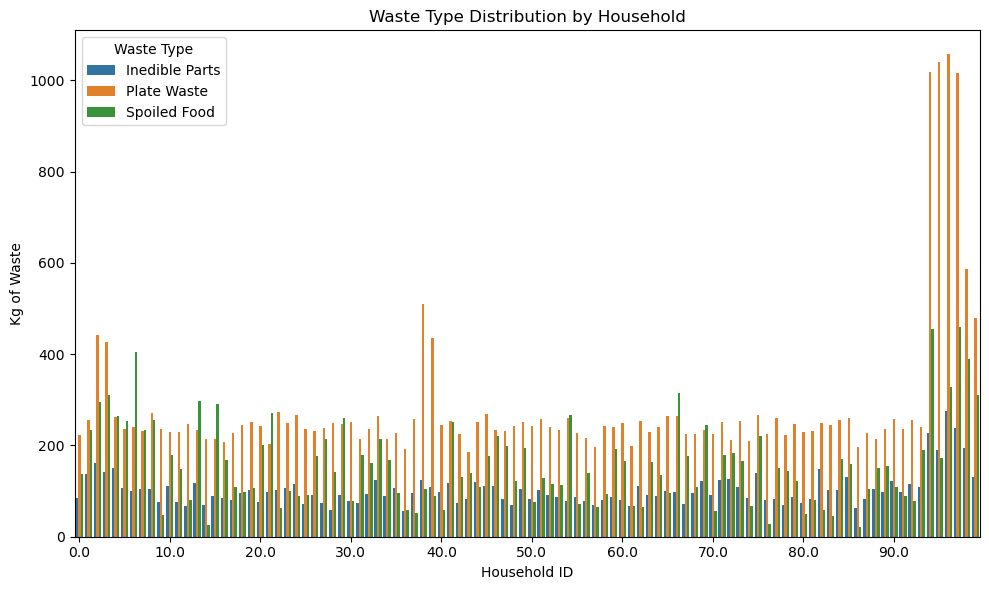

In [ ]:
df_long = df.melt(id_vars="household", value_vars=reason, 
                var_name="Waste Type", value_name="Kg")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x="household", y="Kg", hue="Waste Type")
plt.title("Waste Type Distribution by Household")
plt.ylabel("Kg of Waste")
plt.xlabel("Household ID")
plt.legend(title="Waste Type")
plt.xticks(range(0,100,10))
plt.tight_layout()
plt.show()

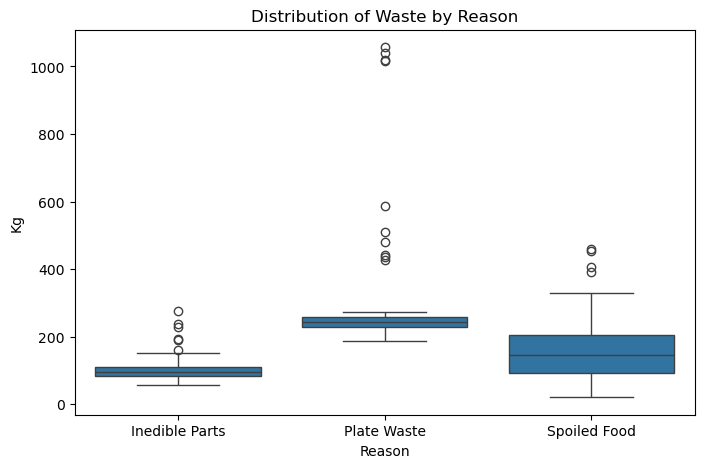

In [ ]:
df_melted = df.melt(id_vars="household", value_vars=reason, 
                    var_name="Reason", value_name="Kg")

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_melted, x="Reason", y="Kg")
plt.title("Distribution of Waste by Reason")
plt.ylabel("Kg")
plt.xlabel("Reason")
plt.show()


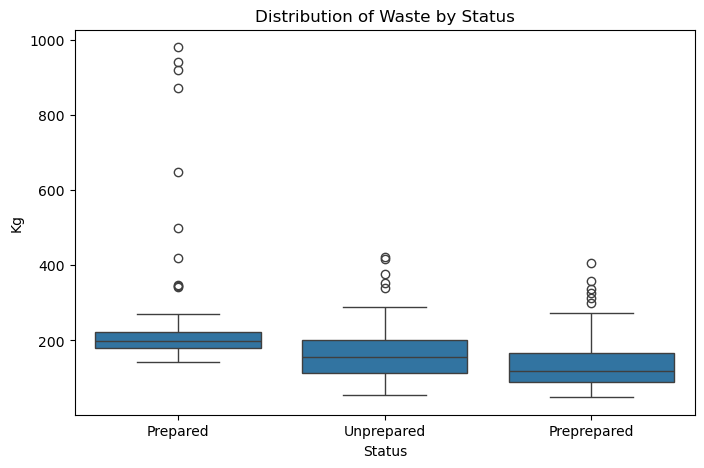

In [ ]:
df_melted = df.melt(id_vars="household", value_vars=status, 
                    var_name="Status", value_name="Kg")

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_melted, x="Status", y="Kg")
plt.title("Distribution of Waste by Status")
plt.ylabel("Kg")
plt.xlabel("Status")
plt.show()


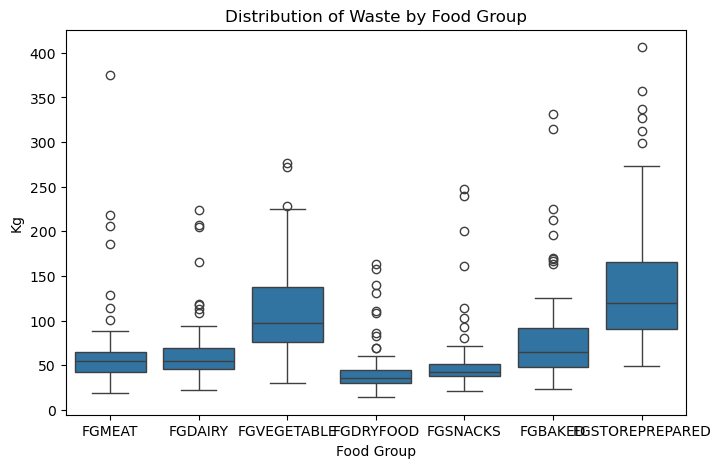

In [ ]:
df_melted = df.melt(id_vars="household", value_vars=food_groups, 
                    var_name="Food Group", value_name="Kg")

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_melted, x="Food Group", y="Kg")
plt.title("Distribution of Waste by Food Group")
plt.ylabel("Kg")
plt.xlabel("Food Group")
plt.show()


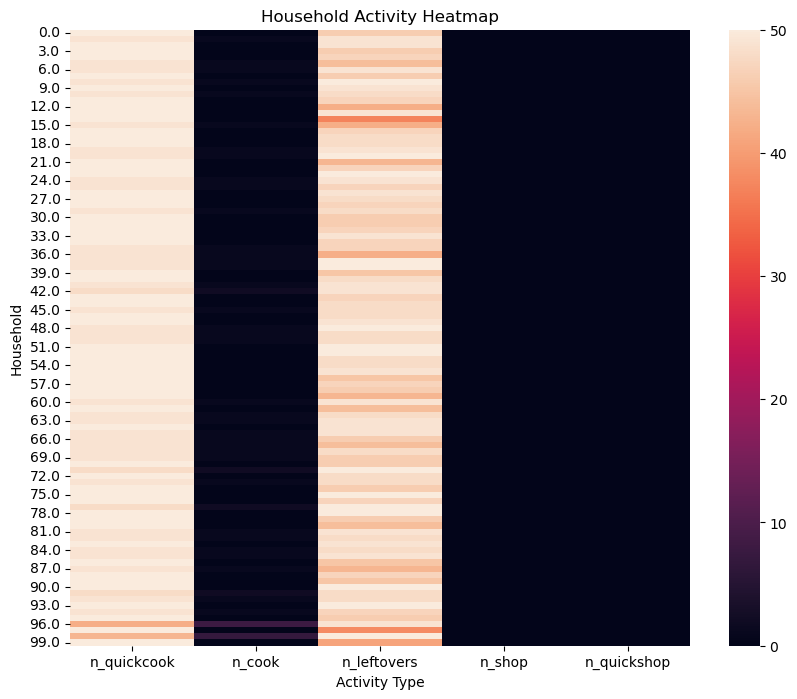

In [ ]:
cols_of_interest = ['n_quickcook', 'n_cook', 'n_leftovers', 'n_shop', 'n_quickshop']
heatmap_data = df.set_index('household')[cols_of_interest].sort_index()
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data) #annot=True
plt.xlabel("Activity Type")
plt.ylabel("Household")
plt.title("Household Activity Heatmap")
plt.show()
